## ** 기말고사 프로젝트 <기말고사 프로젝트 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project(기말고사).ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2022.11.28(월요일) ~ 2022.12.11(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -


### **1. Kaggle의 Personal Key Indicators Heart Disease  데이터를 사용하여 ``의사결정트리(Decision Tree)``, ``랜덤포레스트(Randomforest)``, ``SVM(Support Vector Machine)``생성 모델을 만들고 생성한 모델의 예측결과를 출력하시오**

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 모델 생성에 필요한 전처리 과정을 진행 하시오.
2. 모든 모델의 생성 과정을 코드로 명시 하시오.
3. 적절한 반응변수와 설명변수를 설정 하시오
4. createDataPartition을 사용하여 적절하게  Train set과 Test set을 분류하시오.
5. Train set을 사용하여 모델을 생성하시오.
6. Hyperparameter 튜닝을 진행 하시오.
7. Test set을 이용한 Predict(예측) 결과를 confusionMatrix를 사용하여 출력하시오.
```
데이터 링크 : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download


In [1]:
install.packages("data.table")
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
DF <- read.csv(file = "/content/heart_2020_cleaned.csv") ## Data 읽어오기

Confusion Matrix Plot code

In [3]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

#### 과제에 사용하는 데이터 정상, 비정상 랜덤 추출
 - 정상 데이터 & 비정상 데이터 1000개 랜덤 추출

In [4]:
HD <- DF[DF$HeartDisease == 1, ]
HD_1000 <- HD[sample(nrow(HD), 1000, replace = F), ]

HC <- DF[DF$HeartDisease == 0, ]
HC_1000 <- HC[sample(nrow(HC), 1000, replace = F), ]

data <- bind_rows(HD_1000, HC_1000)
data <- data[sample(1:nrow(data)), ]

#### 데이터 자료형 변환

In [5]:
DF <- DF %>% 
 mutate_at(`.vars` = c("Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "HeartDisease"), `.funs` = as.factor)
DF %>% str()

'data.frame':	54746 obs. of  18 variables:
 $ HeartDisease    : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ BMI             : num  16.6 20.3 26.6 24.2 23.7 ...
 $ Smoking         : Factor w/ 2 levels "0","1": 2 1 2 1 1 2 1 2 1 1 ...
 $ AlcoholDrinking : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Stroke          : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ PhysicalHealth  : int  3 0 20 0 28 6 15 5 0 0 ...
 $ MentalHealth    : int  30 0 30 0 0 0 0 0 0 0 ...
 $ DiffWalking     : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 2 1 2 ...
 $ Sex             : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 2 ...
 $ AgeCategory     : Factor w/ 13 levels "1","2","3","4",..: 8 13 10 12 5 12 11 13 13 10 ...
 $ Race            : Factor w/ 6 levels "1","2","3","4",..: 5 5 5 5 5 3 5 5 5 5 ...
 $ Diabetic        : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 2 1 1 ...
 $ PhysicalActivity: Factor w/ 2 levels "0","1": 2 2 2 1 2 1 2 1 1 2 ...
 $ GenHealth       : int  5 5 2 3 5 

#### **1. 의사결정트리(Decision Tree)**

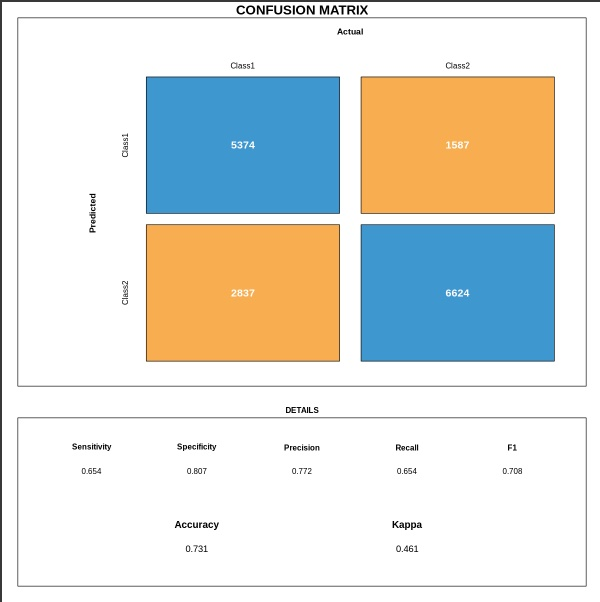

In [ ]:
## 코드 작성

In [6]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [7]:
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
set.seed(31)
index <- createDataPartition(y = DF$HeartDisease , p=0.7,list = FALSE)

train <- DF[index,]
test <- DF[-index,]

HD_train <- rpart(formula = HeartDisease ~ . , data = train , method = "class")

rpart::printcp(HD_train)



Classification tree:
rpart(formula = HeartDisease ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] AgeCategory DiffWalking GenHealth   Sex        

Root node error: 19162/38324 = 0.5

n= 38324 

        CP nsplit rel error  xerror      xstd
1 0.363062      0   1.00000 1.00616 0.0051081
2 0.045507      1   0.63694 0.63694 0.0047596
3 0.022362      2   0.59143 0.59143 0.0046624
4 0.012107      4   0.54671 0.54671 0.0045532
5 0.010000      5   0.53460 0.53460 0.0045212


In [ ]:
HD_train$cptable %>% as_tibble() %>% filter(xerror == min(xerror))
min_xerror <- HD_train$cptable %>% as_tibble() %>% filter(xerror == min(xerror)) %>% pull(CP)
HD_pr <- rpart::prune(HD_train , cp = min_xerror)

CP,nsplit,rel error,xerror,xstd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,5,0.5345997,0.5345997,0.004521235


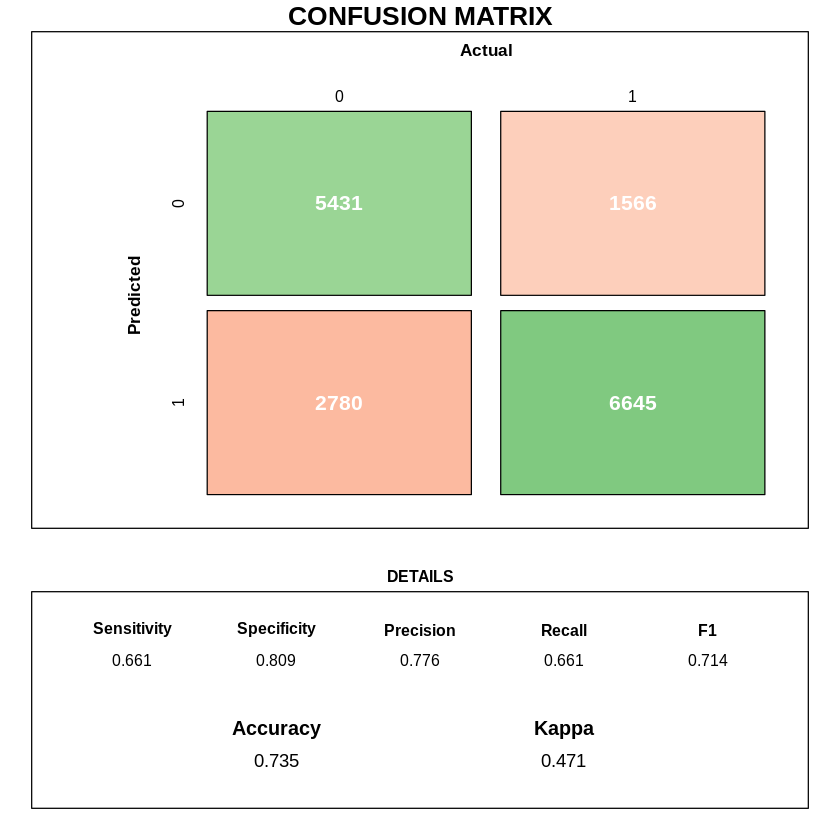

In [ ]:
predict_value = predict(HD_pr, test , type = "class") %>% tibble(predict_value = .)
cm <- caret::confusionMatrix(predict_value$predict_value,test$HeartDisease)
draw_confusion_matrix(cm)

#### **2. 랜덤포레스트(Randomforest)**

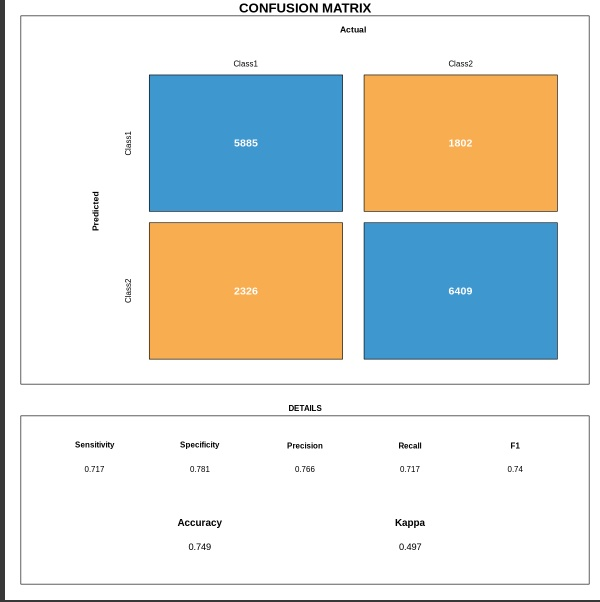

In [ ]:
## 코드 작성

In [10]:
install.packages(c("e1071","ipred","randomForest"))
library(randomForest)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
summary(train)

 HeartDisease      BMI        Smoking   AlcoholDrinking Stroke   
 0:19162      Min.   :12.21   0:17949   0:33106         0:32041  
 1:15970      1st Qu.:24.28   1:17183   1: 2026         1: 3091  
              Median :27.46                                      
              Mean   :28.61                                      
              3rd Qu.:31.87                                      
              Max.   :83.33                                      
                                                                 
 PhysicalHealth    MentalHealth    DiffWalking Sex        AgeCategory   
 Min.   : 0.000   Min.   : 0.000   0:26963     1:16808   11     : 4617  
 1st Qu.: 0.000   1st Qu.: 0.000   1: 8169     2:18324   13     : 4514  
 Median : 0.000   Median : 0.000                         10     : 4367  
 Mean   : 5.234   Mean   : 4.164                         9      : 3910  
 3rd Qu.: 5.000   3rd Qu.: 4.000                         12     : 3624  
 Max.   :30.000   Max.   :30.000  

In [ ]:
HD_RF <- randomForest(HeartDisease ~ . -1, data = train , na.action = na.omit, importance = T, mtry = 7, ntree = 1000)
HD_RF


Call:
 randomForest(formula = HeartDisease ~ . - 1, data = train, importance = T,      mtry = 7, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 25.37%
Confusion matrix:
      0     1 class.error
0 14279  4883   0.2548273
1  4029 11940   0.2523013

In [ ]:
mtry_sqrt <- train %>% select(-1,-HeartDisease) %>% colnames() %>% length() %>% sqrt() %>% floor()
mtry_sqrt

[1] 4

In [ ]:
set.seed(52)
HD_RF <- randomForest(HeartDisease ~ . -1, data = train , na.action = na.omit, importance = T, mtry = mtry_sqrt, ntree = 1000)
HD_RF


Call:
 randomForest(formula = HeartDisease ~ . - 1, data = train, importance = T,      mtry = mtry_sqrt, ntree = 1000, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 24.36%
Confusion matrix:
      0     1 class.error
0 14401  4761   0.2484605
1  3798 12171   0.2378358

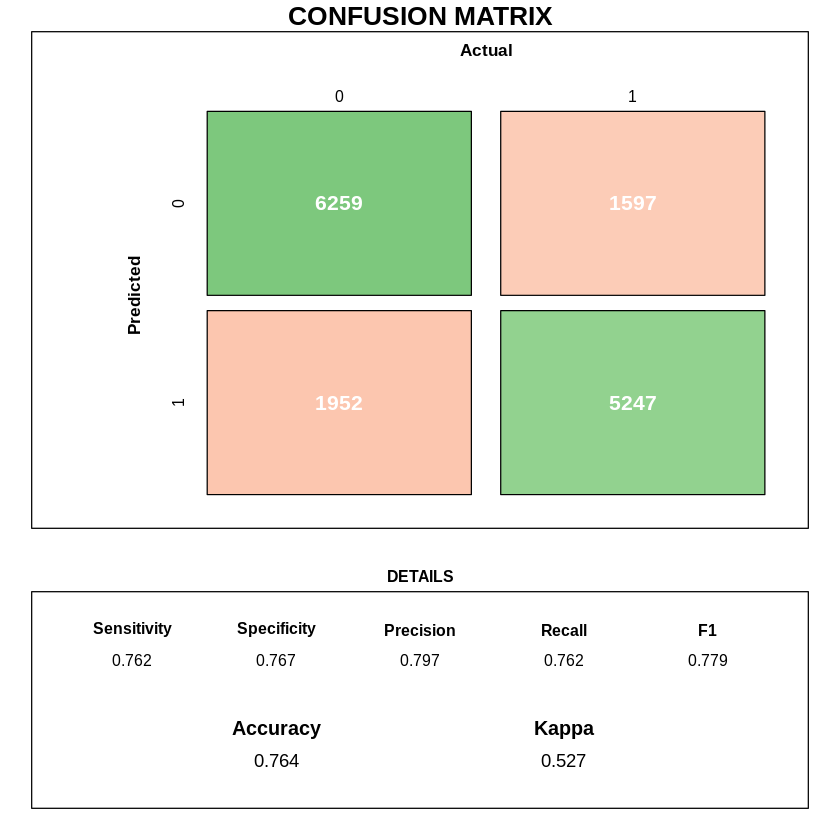

In [ ]:
predict_value <- predict(HD_RF, test , type="class") %>% tibble(predict_value = .)
cm2 <- caret::confusionMatrix(predict_value$predict_value , test$HeartDisease)
draw_confusion_matrix(cm2)

#### **3. SVM(Support Vector Machine)**

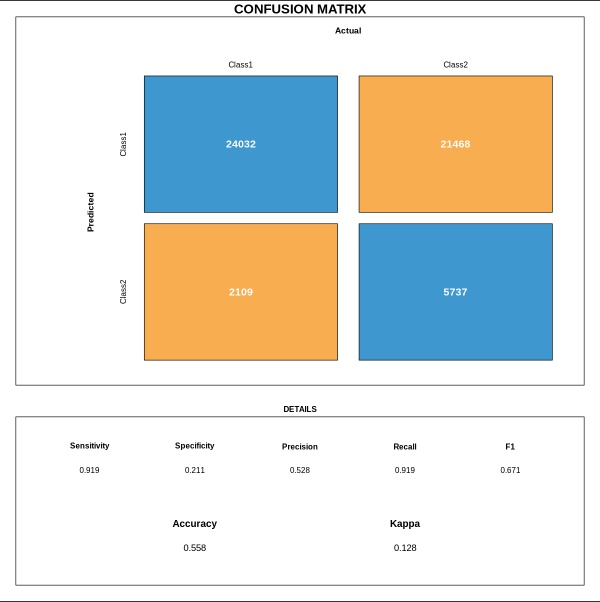

In [ ]:
## 코드 작성

In [ ]:
svm_HD <- e1071::svm(formula = HeartDisease ~ . , data = train , type = "C-classification" , kernel = "radial")
summary(svm_HD)

In [ ]:
#tuned <- e1071::tune.svm(HeartDisease ~ . , data = train , gamma = 10^(-8:1) , cost = 1:30)
#tune_summary <- summary(tuned)
#tune_summary
#best_parameter <- tune_summary$best.parameters
#best_parameter
#tune이 너무 오래걸려서 제외했습니다.

In [11]:
svm_HD <- e1071::svm(formula = HeartDisease ~ . , data = train , type = "C-classification" , kernel = "radial", gammma = 0.1 , cost = 20)
summary(svm_HD)


Call:
svm(formula = HeartDisease ~ ., data = train, type = "C-classification", 
    kernel = "radial", gammma = 0.1, cost = 20)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  20 

Number of Support Vectors:  20883

 ( 10303 10580 )


Number of Classes:  2 

Levels: 
 0 1




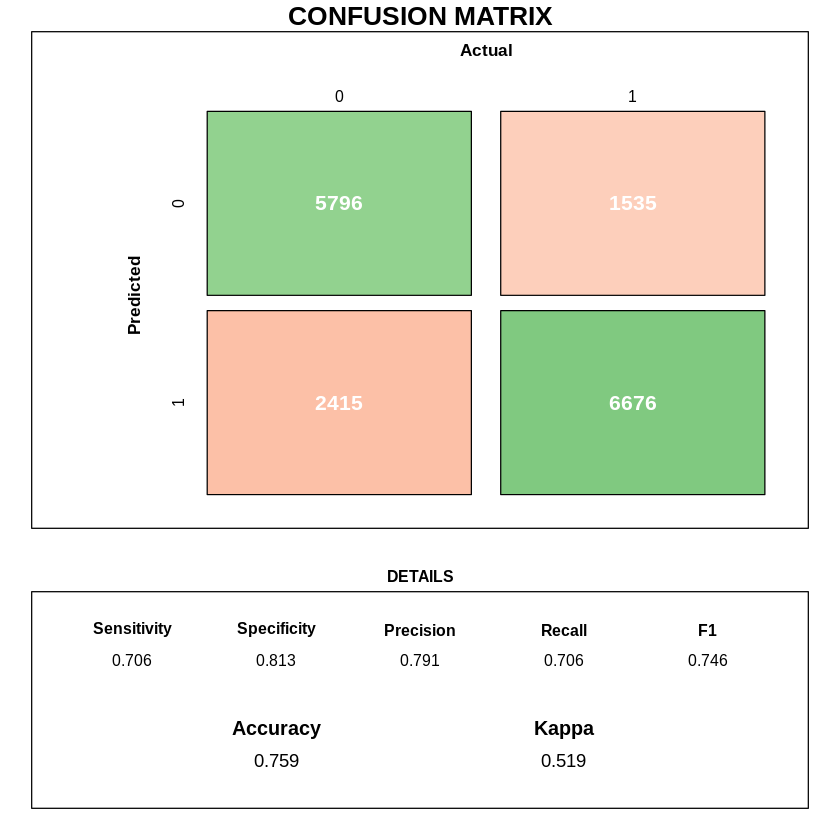

In [12]:
predict_value <- predict(svm_HD, test , type="class") %>% tibble(predict_value = .)
cm3 <- caret::confusionMatrix(predict_value$predict_value , test$HeartDisease)
draw_confusion_matrix(cm3)